In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyEDM as edm
from PyIF import te_compute as te
import pygam as gm
from pyunicorn.timeseries import Surrogates

/exports/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


Generated an instance of the Surrogates class.
Generating correlated noise surrogates...
Calculating original data fft...


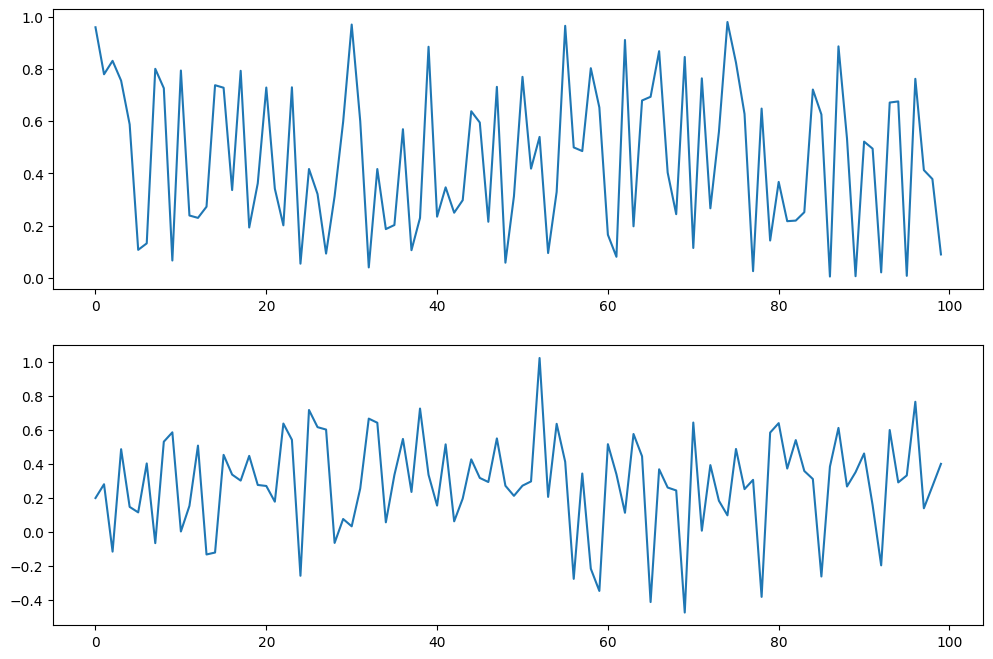

In [2]:
# make correlated noise surrogate series of original data for obtaining pvalues
x = np.array([np.random.rand(100)])
x_2 = Surrogates(x).correlated_noise_surrogates()

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
axes[0].plot(x.T)
axes[1].plot(x_2[0].T)

In [9]:
from pyspi.calculator import Calculator

import numpy as np
import random

random.seed(42)

T = 1000
t, x, y = chaotic_system(corr_yx = 0.5, corr_xy=0, timesteps = 1000, dt = 1, noise = 0)

calc = Calculator(dataset = np.array([x, y]),
                configfile='TE_configs/kraskov_DCE.yaml')
calc.compute()


Loading configuration file: TE_configs/kraskov_DCE.yaml
*** Importing module .statistics.infotheory
[0] Adding SPI .statistics.infotheory.TransferEntropy(x,y,{'estimator': 'kraskov', 'prop_k': 4, 'auto_embed_method': 'MAX_CORR_AIS', 'k_search_max': 2, 'tau_search_max': 2, 'dyn_corr_excl': 'AUTO'})
Succesfully initialised SPI with identifier "te_kraskov_NN-4_DCE_k-max-2_tau-max-2" and labels ['unsigned', 'embedding', 'infotheory', 'temporal', 'directed', 'nonlinear']
Number of SPIs: 1

Normalising the dataset...



Processing [None: te_kraskov_NN-4_DCE_k-max-2_tau-max-2]: 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]


Calculation complete. Time taken: 0.2420s

SPI Computation Results Summary

Total number of SPIs attempted: 1
Number of SPIs successfully computed: 1 (100.00%)
------------------------------------------------------------
Category       | Count | Percentage
------------------------------------------------------------
Successful     |     1 | 100.00%
NaNs           |     0 |   0.00%
Partial NaNs   |     0 |   0.00%
------------------------------------------------------------


In [10]:
calc.table

spi     te_kraskov_NN-4_DCE_k-max-2_tau-max-2          
process                                proc-0    proc-1
proc-0                                    NaN  0.512217
proc-1                              -0.021532       NaN

In [121]:
import sys
print(sys.executable)

/exports/home/paval/papers/CORREDORAS/pablo_python/.conda/bin/python


In [69]:
calc.compute()

Processing [None: te_kraskov_NN-4_DCE_k-max-4_tau-max-3]: 100%|██████████| 1/1 [00:04<00:00,  4.28s/it]


Calculation complete. Time taken: 4.2768s

SPI Computation Results Summary

Total number of SPIs attempted: 1
Number of SPIs successfully computed: 1 (100.00%)
------------------------------------------------------------
Category       | Count | Percentage
------------------------------------------------------------
Successful     |     1 | 100.00%
NaNs           |     0 |   0.00%
Partial NaNs   |     0 |   0.00%
------------------------------------------------------------


In [71]:
dataframe = calc.table
for column in dataframe.columns.levels[0]:
    print(column)
    print(dataframe[column]['proc-0']['proc-1'], dataframe[column]['proc-1']['proc-0'])


te_kraskov_NN-4_DCE_k-max-4_tau-max-3
-0.00842903803220052 0.07063005346544049


In [28]:
import os, shutil
import pyspi

# chose the location where you would like to save the copy 
destination = "./myconfig.yaml"
# get the pyspi directory where config.yaml is located
source = os.path.dirname(pyspi.__file__) + "/config.yaml"
shutil.copy(source, destination)

'./myconfig.yaml'

In [27]:
dataframe['te_kraskov_NN-4_DCE_k-1_kt-1_l-1_lt-1']

process,proc-0,proc-1,proc-2,proc-3,proc-4
proc-0,NaN,-0.010914,-0.004998,-0.016320,0.012965
proc-1,0.001539,NaN,0.005025,0.016533,0.003009
proc-2,0.031085,0.004708,NaN,0.038342,0.001460
proc-3,0.046909,0.018539,0.002798,NaN,-0.005662
proc-4,-0.020246,0.004903,-0.012831,-0.005419,NaN


In [2]:
# Paramecium and Didinium (empirical predator prey)
# data from https://doi.org/10.2307/4195

def Paramecium_Didinium(CC = '0.375', **kwargs):
    kwargs.setdefault('data')
    # read from predator_prey_data/CC0.375.txt
    data = pd.read_csv(f'predator_prey_data/CC{CC}.txt', sep = ',')
    return data['t'].values, data['x'].values, data['y'].values

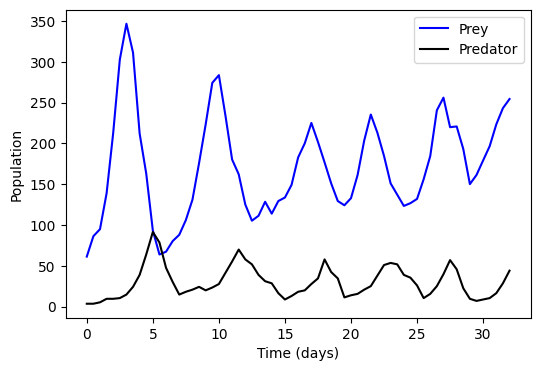

In [3]:
t, x, y = Paramecium_Didinium(CC = '0.375')
# plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(t, x, label='Prey', color = 'blue')
ax.plot(t, y, label='Predator', color = 'black')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Population')
ax.legend()
plt.show()
# fig.savefig('../code/plots_notes/predator_prey_0.5.png')

In [4]:
# transfer entropy
te_xy = te.te_compute(x, y, k=1, embedding=1, safetyCheck=False, GPU=False)
te_yx = te.te_compute(y, x, k=1, embedding=1, safetyCheck=False, GPU=False)
print('Transfer Entropy from x to y:', te_xy)
print('Transfer Entropy from y to x:', te_yx)

Transfer Entropy from x to y: 0.5734250405436065
Transfer Entropy from y to x: -0.3393501874620586


3


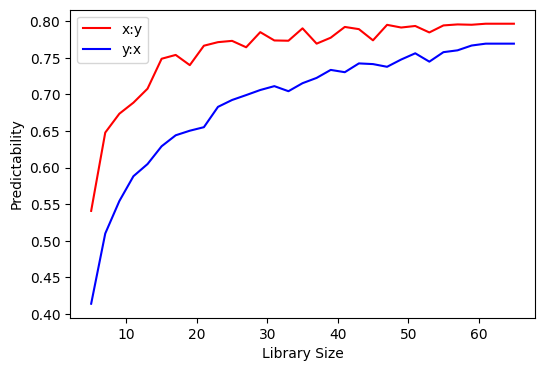

In [ ]:
# CCM
pair = pd.DataFrame({'x': x, 'y': y})
tau = 2
dfE1 = edm.EmbedDimension(dataFrame=pair, lib = [1, int(len(pair)/2)], pred = [int(len(pair)/2), len(pair)],
                            columns='x', target='x', showPlot=False, maxE=6, tau = tau)
dfE2 = edm.EmbedDimension(dataFrame=pair, lib = [1, int(len(pair)/2)], pred = [int(len(pair)/2), len(pair)],
                            columns='y', target='y', showPlot=False, maxE=6, tau = tau)
dfE = pd.concat([dfE1, dfE2])
E = int(dfE.iloc[dfE['rho'].idxmax()]['E'])
print(E)

ccm = edm.CCM(dataFrame=pair, E=E, tau=tau, columns='x', target='y', libSizes=[E+2,len(pair), len(pair)/30], sample=100, showPlot=False)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(ccm['LibSize'], ccm['x:y'], color = 'red', label='x:y')
ax.plot(ccm['LibSize'], ccm['y:x'], color = 'blue', label='y:x')
ax.set_xlabel('Library Size')
ax.set_ylabel('Predictability')
ax.legend()
# fig.savefig('../code/plots_notes/ccm_predator_prey_0.375.png')

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


  9% (1 of 11) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:19
 36% (4 of 11) |#########                | Elapsed Time: 0:00:02 ETA:   0:00:03
 63% (7 of 11) |###############          | Elapsed Time: 0:00:02 ETA:   0:00:01
100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Text(0, 0.5, 'Population')

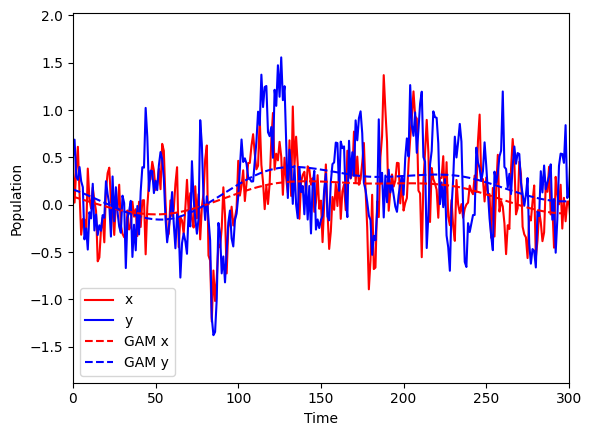

In [5]:
# CAM (coupled autoregressive models)


def CAM(corr_yx = 0, timesteps = 1000, dt = 1, noise = 0.3):
    x = np.array([0.5])
    y = np.array([0.5])
    t = np.arange(0, timesteps, dt)
    for i in range(1, timesteps):
        xtp1 = 0.5*x[i-1] + 0.2*y[i-1] + np.random.normal(0, noise)
        ytp1 = corr_yx*x[i-1] + 0.7*y[i-1] + np.random.normal(0, noise)
        x = np.append(x, xtp1)
        y = np.append(y, ytp1)
    return t, x, y

t, x, y = CAM(corr_yx = 0.3)

# GAM detrending
vt = gm.utils.make_2d(t, verbose=False).astype('float')
gam_x = gm.GAM(terms='auto').gridsearch(vt, x).predict(vt)
gam_y = gm.GAM(terms='auto').gridsearch(vt, y).predict(vt)

# plot
fig,ax = plt.subplots()
ax.plot(t, x, 'r', label='x')
ax.plot(t, y, 'b', label='y')
ax.plot(t, gam_x, 'r--', label='GAM x')
ax.plot(t, gam_y, 'b--', label='GAM y')
ax.legend()
# set x lim
ax.set_xlim(0,300)
ax.set_xlabel('Time')
ax.set_ylabel('Population')


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Text(0, 0.5, 'Population')

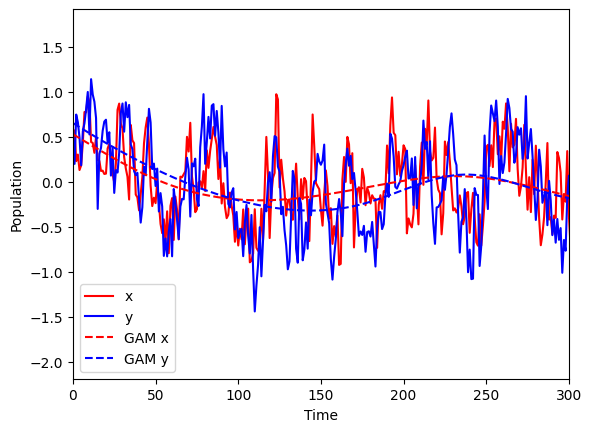

In [7]:
# CAM uncorrelated with external influence

def CAM_external(corr_yx = 0, timesteps = 1000, dt = 1, noise = 0.3):
    x = np.array([0.5])
    y = np.array([0.5])
    t = np.arange(0, timesteps, dt)
    force = np.sin(t/10) + np.sin(t/30)
    for i in range(1, timesteps):
        xtp1 = 0.5*x[i-1] + 0.2*y[i-1] + np.random.normal(0, noise) + 0.1 * force[i]
        ytp1 = corr_yx*x[i-1] + 0.7*y[i-1] + np.random.normal(0, noise) + 0.3 * force[i]
        x = np.append(x, xtp1)
        y = np.append(y, ytp1)
    return t, x, y

t, x, y = CAM(corr_yx = 0.3)

# GAM detrending
vt = gm.utils.make_2d(t, verbose=False).astype('float')
gam_x = gm.GAM(terms='auto').gridsearch(vt, x).predict(vt)
gam_y = gm.GAM(terms='auto').gridsearch(vt, y).predict(vt)

# plot
fig,ax = plt.subplots()
ax.plot(t, x, 'r', label='x')
ax.plot(t, y, 'b', label='y')
ax.plot(t, gam_x, 'r--', label='GAM x')
ax.plot(t, gam_y, 'b--', label='GAM y')
ax.legend()
# set x lim
ax.set_xlim(0,300)
ax.set_xlabel('Time')
ax.set_ylabel('Population')


In [11]:
# fig.savefig('../code/plots_notes/CAM.png', bbox_inches='tight')


Text(0, 0.5, 'Population')

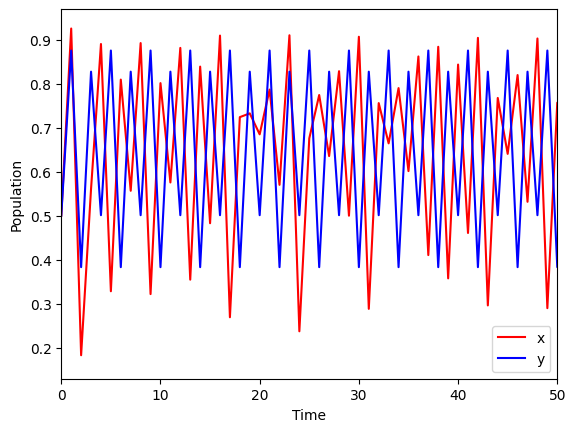

In [2]:
# python
def chaotic_system(corr_yx, corr_xy=0.1, timesteps = 1000, dt = 1, noise = 0):
    x = np.array([.5])
    y = np.array([.5])
    t = np.arange(0, timesteps, dt)
    for i in range(1, timesteps):
        xtp1 = x[i-1]*(3.8-3.8*x[i-1] - corr_xy*y[i-1]) + np.random.normal(0, noise)
        ytp1 = y[i-1]*(3.5-3.5*y[i-1] - corr_yx*x[i-1]) + np.random.normal(0, noise)
        x = np.append(x, xtp1)
        y = np.append(y, ytp1)
    return t, x, y

t, x, y = chaotic_system(0)
# plot
fig,ax = plt.subplots()
ax.plot(t, x, 'r', label='x')
ax.plot(t, y, 'b', label='y')
ax.legend()
# set x lim
ax.set_xlim(0, 50)
ax.set_xlabel('Time')
ax.set_ylabel('Population')

# fig.savefig('../code/plots_notes/chaotic_system.png')


## TE between the two as a function of causality and noise

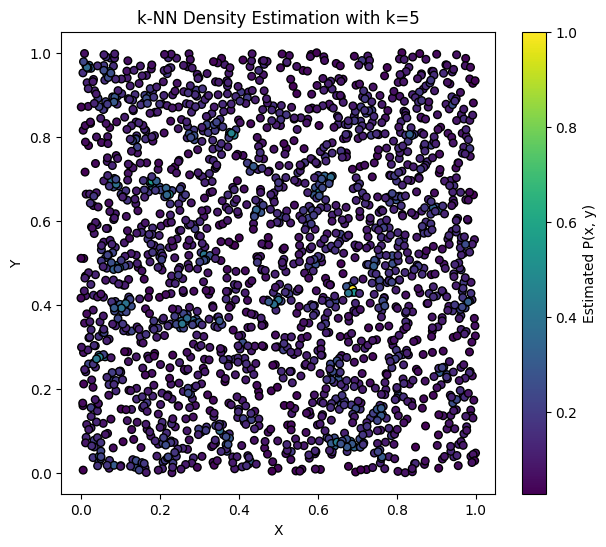

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Generate random points in a 2D plane
np.random.seed(42)
N = 2000  # Number of points
X = np.random.rand(N, 2)  # 2D points (x, y)

# Set k for k-NN
k = 5

# Use NearestNeighbors to find k nearest neighbors
nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='ball_tree').fit(X)
distances, _ = nbrs.kneighbors(X)  # distances to neighbors

# Compute volume of k-nearest neighbor hypersphere in 2D (circle area)
V = np.pi * (distances[:, -1] ** 2)  # Last column is the k-th neighbor distance
P_xy = k / (N * V)  # Probability density estimation

# Normalize for visualization
P_xy /= np.max(P_xy)

# Plot the results
plt.figure(figsize=(7, 6))
plt.scatter(X[:, 0], X[:, 1], c=P_xy, cmap='viridis', s=30, edgecolors='k')
plt.colorbar(label="Estimated P(x, y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"k-NN Density Estimation with k={k}")
plt.show()


  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                        

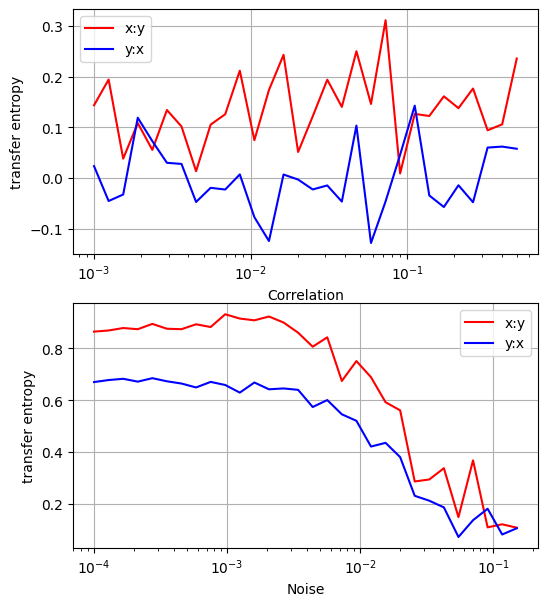

In [10]:
fig, axes = plt.subplots(2,1, figsize=(6,7))

# dynamical_system = chaotic_system # dynamical system
dynamical_system = CAM # dynamical system
dynamical_system = CAM_external # dynamical system

k = 2
embedding = 1

# compute transfer entropy for different values of correlation
min_corr_yx = 0.001
max_corr_yx = 0.5
results = pd.DataFrame({'x:y':[], 'y:x':[]})
pair = pd.DataFrame({'x': x, 'y': y})

for i in range(30):
    corr_yx = min_corr_yx * (max_corr_yx/min_corr_yx) ** (i/29)
    t, x, y = dynamical_system(corr_yx = corr_yx, timesteps = 1000)
    # GAM detrending
    vt = gm.utils.make_2d(t, verbose=False).astype('float')
    gam_x = gm.GAM(terms='auto').gridsearch(vt, x)
    gam_y = gm.GAM(terms='auto').gridsearch(vt, y)
    x = x - gam_x.predict(vt)
    y = y - gam_y.predict(vt)

    pair = pd.DataFrame({'x': x, 'y': y})
    transfer_xy = te.te_compute(pair['x'].values, pair['y'].values, k=k, embedding=embedding, safetyCheck=False, GPU=False)
    transfer_yx = te.te_compute(pair['y'].values, pair['x'].values, k=k, embedding=embedding, safetyCheck=False, GPU=False)
    results = pd.concat([results, pd.DataFrame({'x:y':[transfer_xy], 'y:x':[transfer_yx]}, index=[corr_yx])], axis=0)

ax = axes[0]
ax.plot(results.index, results['x:y'], 'r', label='x:y')
ax.plot(results.index, results['y:x'], 'b', label='y:x')
ax.legend()
ax.set_xlabel('Correlation')
ax.set_ylabel('transfer entropy')
ax.grid()
ax.set_xscale('log')

# compute transfer entropy for different values of noise
min_noise = 0.0001
max_noise = 0.15
corr_yx = 0.5
results = pd.DataFrame({'x:y':[], 'y:x':[]})
pair = pd.DataFrame({'x': x, 'y': y})

for i in range(30):
    noise = min_noise * (max_noise/min_noise) ** (i/29)
    t, x, y = dynamical_system(corr_yx = corr_yx, noise = noise, timesteps = 1000)
    
    # GAM detrending
    vt = gm.utils.make_2d(t, verbose=False).astype('float')
    gam_x = gm.GAM(terms='auto').gridsearch(vt, x)
    gam_y = gm.GAM(terms='auto').gridsearch(vt, y)
    x = x - gam_x.predict(vt)
    y = y - gam_y.predict(vt)
    
    # if there are nan values, we break out of the loop
    if np.isnan(x).any() or np.isnan(y).any():
        break
    pair = pd.DataFrame({'x': x, 'y': y})
    transfer_xy = te.te_compute(pair['x'].values, pair['y'].values, k=k, embedding=embedding, safetyCheck=False, GPU=False)
    transfer_yx = te.te_compute(pair['y'].values, pair['x'].values, k=k, embedding=embedding, safetyCheck=False, GPU=False)
    results = pd.concat([results, pd.DataFrame({'x:y':[transfer_xy], 'y:x':[transfer_yx]}, index=[noise])], axis=0)

ax1 = axes[1]
ax1.plot(results.index, results['x:y'], 'r', label='x:y')
ax1.plot(results.index, results['y:x'], 'b', label='y:x')
ax1.legend()
ax1.set_xlabel('Noise')
ax1.set_ylabel('transfer entropy')
ax1.grid()
ax1.set_xscale('log')

In [173]:
fig.savefig('../code/plots_notes/TE_CAM_1000_detrend.png')

## CCM between the two as a function of causality and noise

    E       rho
0   1  0.824837
1   2  0.866423
2   3  0.878553
3   4  0.881578
4   5  0.885705
5   6  0.888842
6   7  0.889490
7   8  0.892723
8   9  0.889105
9  10  0.884918
0   1  0.960418
1   2  0.964198
2   3  0.964916
3   4  0.968737
4   5  0.968583
5   6  0.967129
6   7  0.965778
7   8  0.964982
8   9  0.962741
9  10  0.959559


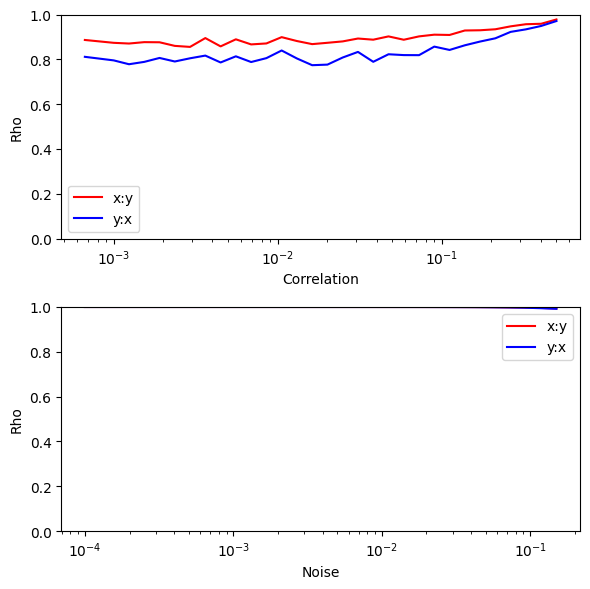

In [11]:
fig_CCM, axes = plt.subplots(2,1, figsize=(6,6))

pair = pd.DataFrame({'x': x, 'y': y})
columns = ['x']
target = 'y'

# dynamical_system = chaotic_system # dynamical system
dynamical_system = CAM # dynamical system
dynamical_system = CAM_external # dynamical system

tau = 1

results = pd.DataFrame({'x:y':[], 'y:x':[]})

t, x, y = dynamical_system(corr_yx = 0.2)
pair = pd.DataFrame({'x': x, 'y': y})
dfE1 = edm.EmbedDimension(dataFrame=pair, lib = [1, int(len(pair)/2)], pred = [int(len(pair)/2), len(pair)],
                            columns=columns, target=columns[0], showPlot=False, maxE=10)
dfE2 = edm.EmbedDimension(dataFrame=pair, lib = [1, int(len(pair)/2)], pred = [int(len(pair)/2), len(pair)],
                            columns=target, target=target, showPlot=False, maxE=10)
dfE = pd.concat([dfE1, dfE2])
E = int(dfE.iloc[dfE['rho'].idxmax()]['E'])
print(dfE)

t, x, y = dynamical_system(corr_yx = 0)
pair = pd.DataFrame({'x': x, 'y': y})
ccm = edm.CCM(dataFrame=pair, E=E, tau=tau, columns='y', target='x', libSizes=[E+2,len(pair), 30], sample=15)
results = pd.concat([results, pd.DataFrame({'x:y':[ccm['x:y'].iloc[-1]], 'y:x':[ccm['y:x'].iloc[-1]]}, index=[min_corr_yx/1.5])], axis=0)

min_corr_yx = 0.001
max_corr_yx = 0.5
for i in range(30):
    corr_yx = min_corr_yx * (max_corr_yx/min_corr_yx) ** (i/29)

    t, x, y = dynamical_system(corr_yx = corr_yx)
    pair = pd.DataFrame({'x': x, 'y': y})
    ccm = edm.CCM(dataFrame=pair, E=E, tau=tau, columns='y', target='x', libSizes=[E+2,len(pair)], sample=100)
    results = pd.concat([results, pd.DataFrame({'x:y':[ccm['x:y'].iloc[-1]], 'y:x':[ccm['y:x'].iloc[-1]]}, index=[corr_yx])], axis=0)

ax = axes[0]
ax.plot(results.index, results['x:y'], 'r', label='x:y')
ax.plot(results.index, results['y:x'], 'b', label='y:x')
ax.legend()
ax.set_xlabel('Correlation')
ax.set_ylabel('Rho')
ax.set_ylim(0,1)
ax.set_xscale('log')

ax2 = axes[1]
min_noise = 0.0001
max_noise = 0.15
corr_yx = 0.5
results = pd.DataFrame({'x:y':[], 'y:x':[]})
for i in range(30):
    noise = min_noise * (max_noise/min_noise) ** (i/29)
    t, x, y = dynamical_system(corr_yx = corr_yx, noise = noise)

    if np.isnan(x).any() or np.isnan(y).any():
        break
    pair = pd.DataFrame({'x': x, 'y': y})
    ccm = edm.CCM(dataFrame=pair, E=E, tau=tau, columns='y', target='x', libSizes=[E+2,len(pair)], sample=100)
    results = pd.concat([results, pd.DataFrame({'x:y':[ccm['x:y'].iloc[-1]], 'y:x':[ccm['y:x'].iloc[-1]]}, index=[noise])], axis=0)

ax2.plot(results.index, results['x:y'], 'r', label='x:y')
ax2.plot(results.index, results['y:x'], 'b', label='y:x')
ax2.legend()
ax2.set_xlabel('Noise')
ax2.set_ylabel('Rho')
ax2.set_ylim(0,1)
ax2.set_xscale('log')
fig_CCM.tight_layout()

In [144]:
fig_CCM.savefig('../code/plots_notes/CCM_CAM.png')

    E       rho
0   1  0.998512
1   2  0.998812
2   3  0.998222
3   4  0.997252
4   5  0.994893
5   6  0.993505
6   7  0.990249
7   8  0.983406
8   9  0.965743
9  10  0.952834
0   1  0.985586
1   2  0.997299
2   3  0.996572
3   4  0.994474
4   5  0.993165
5   6  0.988104
6   7  0.985768
7   8  0.981200
8   9  0.979980
9  10  0.975652


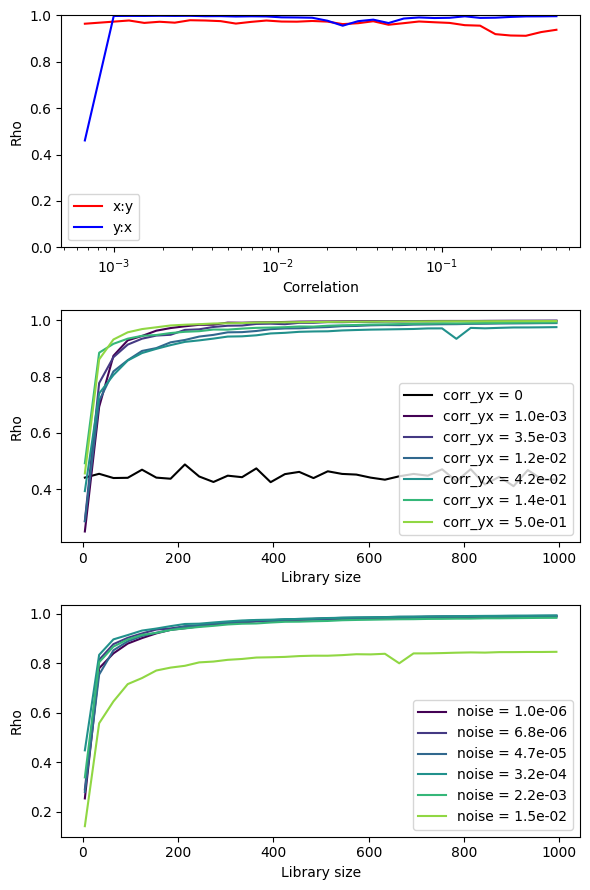

In [103]:
fig, axes = plt.subplots(3,1, figsize=(6,9))

pair = pd.DataFrame({'x': x, 'y': y})
columns = ['x']
target = 'y'


tau = 1

results = pd.DataFrame({'x:y':[], 'y:x':[]})

t, x, y = chaotic_system(corr_yx = 0.2)
pair = pd.DataFrame({'x': x, 'y': y})
dfE1 = edm.EmbedDimension(dataFrame=pair, lib = [1, int(len(pair)/2)], pred = [int(len(pair)/2), len(pair)],
                            columns=columns, target=columns[0], showPlot=False, maxE=10)
dfE2 = edm.EmbedDimension(dataFrame=pair, lib = [1, int(len(pair)/2)], pred = [int(len(pair)/2), len(pair)],
                            columns=target, target=target, showPlot=False, maxE=10)
dfE = pd.concat([dfE1, dfE2])
E = int(dfE.iloc[dfE['rho'].idxmax()]['E'])
print(dfE)

t, x, y = chaotic_system(corr_yx = 0)
pair = pd.DataFrame({'x': x, 'y': y})
ccm = edm.CCM(dataFrame=pair, E=E, tau=tau, columns='y', target='x', libSizes=[E+2,len(pair)], sample=15)
results = pd.concat([results, pd.DataFrame({'x:y':[ccm['x:y'].iloc[-1]], 'y:x':[ccm['y:x'].iloc[-1]]}, index=[min_corr_yx/1.5])], axis=0)

min_corr_yx = 0.001
max_corr_yx = 0.5
for i in range(30):
    corr_yx = min_corr_yx * (max_corr_yx/min_corr_yx) ** (i/29)

    t, x, y = chaotic_system(corr_yx = corr_yx)
    pair = pd.DataFrame({'x': x, 'y': y})
    ccm = edm.CCM(dataFrame=pair, E=E, tau=tau, columns='y', target='x', libSizes=[E+2,len(pair), 30], sample=15)
    results = pd.concat([results, pd.DataFrame({'x:y':[ccm['x:y'].iloc[-1]], 'y:x':[ccm['y:x'].iloc[-1]]}, index=[corr_yx])], axis=0)

ax = axes[0]
ax.plot(results.index, results['x:y'], 'r', label='x:y')
ax.plot(results.index, results['y:x'], 'b', label='y:x')
ax.legend()
ax.set_xlabel('Correlation')
ax.set_ylabel('Rho')
ax.set_ylim(0,1)
ax.set_xscale('log')

ax2 = axes[1]
ax2.clear()

t, x, y = chaotic_system(corr_yx = 0)
pair = pd.DataFrame({'x': x, 'y': y})
ccm = edm.CCM(dataFrame=pair, E=E, tau=tau, columns='y', target='x', libSizes=[E+2,len(pair), 30], sample=25)
# label in scientific notation
ax2.plot(ccm['LibSize'], ccm['y:x'], label='corr_yx = 0', color = 'k')

for i in range(6):
    corr_yx = min_corr_yx * (max_corr_yx/min_corr_yx) ** (i/5)
    t, x, y = chaotic_system(corr_yx = corr_yx)
    pair = pd.DataFrame({'x': x, 'y': y})
    ccm = edm.CCM(dataFrame=pair, E=E, tau=tau, columns='y', target='x', libSizes=[E+2,len(pair), 30], sample=25)
    # label in scientific notation
    ax2.plot(ccm['LibSize'], ccm['y:x'], label='corr_yx = {:.1e}'.format(corr_yx), color = plt.cm.viridis(i/6))
    ax2.legend()

ax2.set_xlabel('Library size')
ax2.set_ylabel('Rho')

ax3 = axes[2]
for i in range(6):
    corr_yx = 0.2
    min_noise = 0.000001
    max_noise = 0.015
    noise = min_noise * (max_noise/min_noise) ** (i/5)
    t, x, y = chaotic_system(corr_yx = corr_yx, noise = noise)
    pair = pd.DataFrame({'x': x, 'y': y})
    ccm = edm.CCM(dataFrame=pair, E=E, tau=tau, columns='y', target='x', libSizes=[E+2,len(pair), 30], sample=25)
    # label in scientific notation
    ax3.plot(ccm['LibSize'], ccm['y:x'], label='noise = {:.1e}'.format(noise), color = plt.cm.viridis(i/6))
    ax3.legend()
ax3.set_xlabel('Library size')
ax3.set_ylabel('Rho')

fig.tight_layout()

# fig.savefig('../code/plots_notes/CCM_chaos.png')

### chaotic system causation with uncorrelated sine wave

(0.0, 50.0)

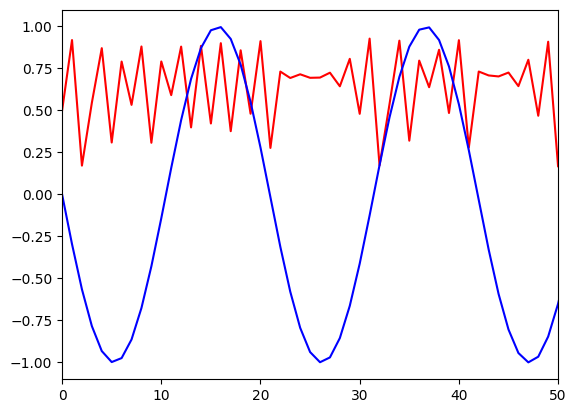

In [42]:
t, x, y = chaotic_system(corr_yx = 0.02)
y = np.sin(-0.3*t) #+ 0.1 * x
x = x + 0.02 * y
fig, ax = plt.subplots()
ax.plot(t, x, 'r', label='x')
ax.plot(t, y, 'b', label='y')
ax.set_xlim(0, 50)

In [15]:
distances.sort_values()

100    0.000000
334    0.015944
472    0.016567
82     0.017020
290    0.019560
         ...   
32     0.674611
2      0.675815
212    0.679511
50     0.681420
499         NaN
Length: 500, dtype: float64

MovieWriter ffmpeg unavailable; using Pillow instead.
/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/paval/papers/CORREDORAS/pablo_p

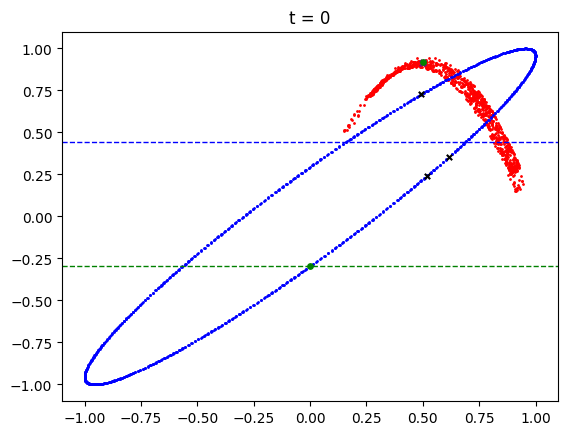

In [ ]:
import matplotlib.animation as animation

embedding = edm.Embed(dataFrame=pd.DataFrame({'x': x, 'y': y}), E=2, tau=1, columns=['x','y'])

fig, ax = plt.subplots()

def update(i):
    point = embedding.iloc[i]
    distances = np.sqrt((embedding['x(t+0)'] - point['x(t+0)'])**2 + (embedding['x(t+1)'] - point['x(t+1)'])**2)
    neighbors = embedding.iloc[np.argsort(distances)[1:4]]
    ax.clear()
    ax.scatter('x(t+0)', 'x(t+1)', data = embedding, marker='o', color='r', linestyle='None', label='x', s=1)
    ax.scatter('y(t+0)', 'y(t+1)', data = embedding, marker='o', color='b', linestyle='None', label='y', s = 1)
    ax.scatter(neighbors['x(t+0)'], neighbors['x(t+1)'], marker='x', color='purple', linestyle='None', label='x', s=15)
    ax.scatter(neighbors['y(t+0)'], neighbors['y(t+1)'], marker='x', color='black', linestyle='None', label='y', s = 15)
    ax.scatter(point['x(t+0)'], point['x(t+1)'], marker='o', color='green', linestyle='None', label='x', s=15)
    ax.scatter(point['y(t+0)'], point['y(t+1)'], marker='o', color='green', linestyle='None', label='y', s = 15)

    # draw horizontal line at embedding['y(t+1)'][i]
    ax.axhline(y=point['y(t+1)'], color='g', lw=1, ls='--')
    # predict point['y(t+1)'] from the neighbors average
    prediction = neighbors['y(t+1)'].mean()
    ax.axhline(y=prediction, color='b', lw=1, ls='--')

    ax.set_title('t = {}'.format(i))

    return ax

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('t+0')
ax.set_ylabel('t+1')

ani = animation.FuncAnimation(fig, update, frames=range(0,len(embedding), 2))
ani.save('plots-tests/animation_2.gif', fps = 1)

/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/f

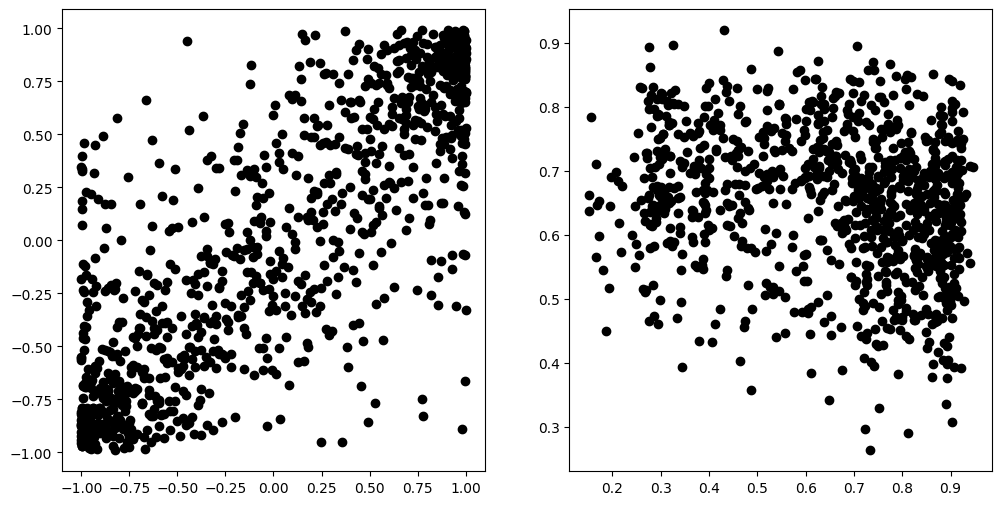

In [46]:
# make a scatter plot of predictions against true values

embedding = edm.Embed(dataFrame=pd.DataFrame({'x': x, 'y': y}), E=2, tau=1, columns=['x','y'])
fig, axes = plt.subplots(1,2, figsize=(12,6))
ax = axes[0]
for i in range(1, len(embedding)):
    point = embedding.iloc[i]
    distances = np.sqrt((embedding['x(t+0)'] - point['x(t+0)'])**2 + (embedding['x(t+1)'] - point['x(t+1)'])**2)
    neighbors = embedding.iloc[np.argsort(distances)[1:4]]
    prediction = neighbors['y(t+1)'].mean()
    ax.scatter(point['y(t+1)'], prediction, color='black')

embedding = edm.Embed(dataFrame=pd.DataFrame({'x': y, 'y': x}), E=2, tau=1, columns=['x','y'])
ax2 = axes[1]
for i in range(1, len(embedding)):
    point = embedding.iloc[i]
    distances = np.sqrt((embedding['x(t+0)'] - point['x(t+0)'])**2 + (embedding['x(t+1)'] - point['x(t+1)'])**2)
    neighbors = embedding.iloc[np.argsort(distances)[1:4]]
    prediction = neighbors['y(t+1)'].mean()
    ax2.scatter(point['y(t+1)'], prediction, color='black')


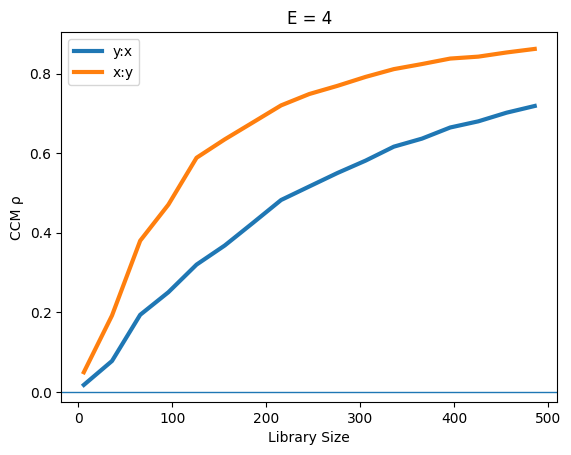

In [58]:


pair = pd.DataFrame({'x': x, 'y': y})
columns = ['x']
target = 'y'
dfE = edm.EmbedDimension(dataFrame=pair, lib = [1, len(pair)], pred = [1, len(pair)],
                            columns=columns, target=target, showPlot=False, maxE=10)
E = 4

# plt.plot(t,x)
# plt.plot(t,y)
ccm = edm.CCM(dataFrame=pair, E=E, tau=1, columns='y', target='x', libSizes=[E+2,len(pair), 30], sample=15, showPlot = True)

## Is rho just the correlation between prediction and real value in the next timestep?

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pyEDM as edm
import pandas as pd

### uncorrelated sine waves, sharp vs smooth

E =  1
E =  1


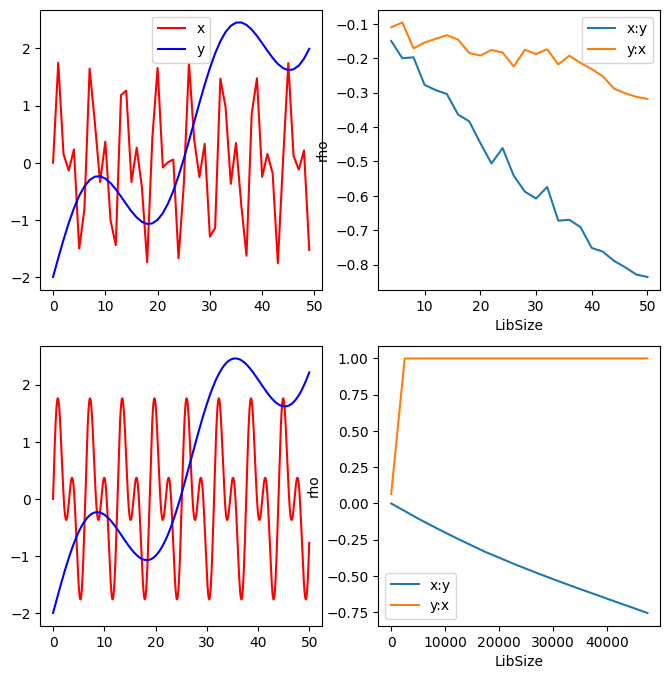

In [28]:
# sine wave
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

d_t = 1
d_t2 = 0.001
t = np.arange(0, 50, d_t)
t2 = np.arange(0, 50, d_t2)

x = np.sin(t) + np.sin(2*t)
x2 = np.sin(t2) + np.sin(2*t2)

# correlated
# y = x + np.sin(3.234 * t) * 0.1
# y2 = x2 + np.sin(3.234 * t2) * 0.1
# y = np.roll(y,   int(2/d_t))
# y2 = np.roll(y2, int(2/d_t2))

# uncorrelated
y = np.sin(0.2333*t) + 0.1 * t - 2
y2 = np.sin(0.2333*t2) + 0.1 * t2 - 2

axes[0,0].plot(t, x, 'r', label='x')
axes[0,0].plot(t, y, 'b', label='y')
axes[0,0].legend()

axes[1,0].plot(t2, x2, 'r', label='x')
axes[1,0].plot(t2, y2, 'b', label='y')


# convergent cross mapping
pair = pd.DataFrame({'x':x, 'y':y}, index = t)

embedded_dim = edm.EmbedDimension(dataFrame=pair, lib = [1, len(pair)], pred = [1, len(pair)], 
                       columns = 'x', target = 'y', showPlot=False)
E = int(embedded_dim.iloc[embedded_dim['rho'].idxmax()]['E'])
print('E = ', E)
E = 2

result = edm.CCM(dataFrame=pair,
                    columns = 'x', target = 'y',
                    E = E, Tp=0, libSizes =[E+2, len(pair), len(pair)/20],
                    sample = 20, showPlot=False)
axes[0,1].plot(result['LibSize'], result['x:y'], label = 'x:y')
axes[0,1].plot(result['LibSize'], result['y:x'], label = 'y:x')
axes[0,1].legend()
axes[0,1].set_xlabel('LibSize')
axes[0,1].set_ylabel('rho')

pair = pd.DataFrame({'x':x2, 'y':y2}, index = t2)

embedded_dim = edm.EmbedDimension(dataFrame=pair, lib = [1, len(pair)], pred = [1, len(pair)], 
                       columns = 'x', target = 'y', showPlot=False)
E = int(embedded_dim.iloc[embedded_dim['rho'].idxmax()]['E'])
print('E = ', E)
E = 2

result2 = edm.CCM(dataFrame=pair,
                    columns = 'x', target = 'y',
                    E = E, Tp=0, libSizes =[E+2, len(pair), len(pair)/20],
                    sample = 20, showPlot=False, tau = int(1/d_t2))
axes[1,1].plot(result2['LibSize'], result2['x:y'], label = 'x:y')
axes[1,1].plot(result2['LibSize'], result2['y:x'], label = 'y:x')
axes[1,1].legend()
axes[1,1].set_xlabel('LibSize')
axes[1,1].set_ylabel('rho')


plt.show()

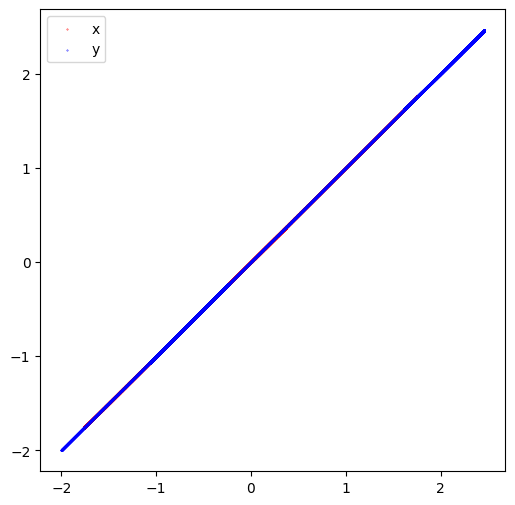

In [38]:
# embed the data to visualize why the y:x is so high

embedding = edm.Embed(dataFrame=pd.DataFrame({'x': x2, 'y': y2}), E=2, tau=1, columns=['x','y'])

# plot the embedding
fig,ax = plt.subplots(figsize = (6,6))
ax.scatter('x(t+0)', 'x(t+1)', data = embedding, marker='o', color='r', linestyle='None', label='x', s=0.1)
ax.scatter('y(t+0)', 'y(t+1)', data = embedding, marker='o', color='b', linestyle='None', label='y', s = 0.1)
ax.legend()
